# Forecasting

In [3]:
install.packages('fpp')
install.packages('dplyr')

Installing package into ‘/home/anfiniti/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



also installing the dependencies ‘TTR’, ‘curl’, ‘quantmod’, ‘forecast’, ‘fma’, ‘expsmooth’, ‘tseries’


Warning message in install.packages("fpp"):
“installation of package ‘curl’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘TTR’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘quantmod’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘tseries’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘forecast’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘fma’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘expsmooth’ had non-zero exit status”
Warning message in install.packages("fpp"):
“installation of package ‘fpp’ had non-zero exit status”
Installing package into ‘/home/anfiniti/R/x86_64-pc-linux-gnu-libra

In [9]:
library(fpp)
library(dplyr)
penumpang <- read.csv('International_Report_Passengers.csv')

print(penumpang)

       data_dte Year Month usg_apt_id usg_apt usg_wac fg_apt_id fg_apt fg_wac
1    07/01/2004 2004     7      14747     SEA      93     16229    YVR    906
2    11/01/2008 2008    11      11697     FLL      33     12010    GUA    127
3    10/01/2002 2002    10      10257     ALB      22     16271    YYZ    936
4    03/01/2007 2007     3      12889     LAS      85     13165    MAN    493
5    03/01/2009 2009     3      12892     LAX      91     13252    MEX    148
6    05/01/2005 2005     5      11298     DFW      74     10920    CDG    427
7    04/01/2009 2009     4      13303     MIA      33     14838    SJO    110
8    04/01/2010 2010     4      14843     SJU       3     13068    LRM    224
9    02/01/2007 2007     2      13303     MIA      33     14717    SCL    324
10   08/01/2001 2001     8      11618     EWR      21     15018    STN    493
11   11/01/2002 2002    11      14524     RIC      38     11731    FPO    204
12   09/01/2010 2010     9      11697     FLL      33     14838 

In [11]:
data_bulan_tahun <- penumpang %>% select(Month,Year,Total) %>% group_by(Month,Year) %>% summarise(total_sales=sum(Total))
data_sorting <- arrange(select(data_bulan_tahun,Month,Year,total_sales),Year)
print(data_sorting)

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


# A tibble: 411 × 3
# Groups:   Month [12]
   Month  Year total_sales
   <int> <int>       <int>
 1     1  1990     6271648
 2     2  1990     5608228
 3     3  1990     7261485
 4     4  1990     6666438
 5     5  1990     6684581
 6     6  1990     7629021
 7     7  1990     8677938
 8     8  1990     9100434
 9     9  1990     7123752
10    10  1990     6632612
# ℹ 401 more rows


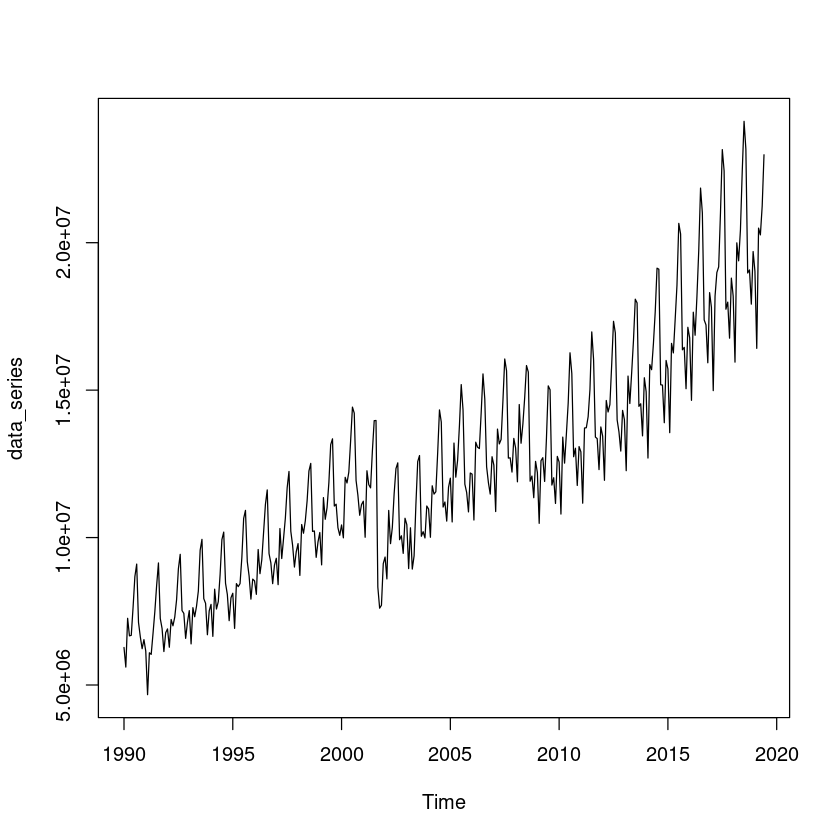

In [12]:
data_series = ts(data_sorting$total_sales,start=c(1990, 1), end=c(2019, 6), frequency = 12)
plot(data_series)

# Metode Exponential State Smoothing(ETS)


Forecast method: ETS(M,Ad,M)

Model Information:
ETS(M,Ad,M) 

Call:
ets(y = data_series)

  Smoothing parameters:
    alpha = 0.9402 
    beta  = 0.0018 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 6816774.2925 
    b = 31426.7268 
    s = 0.9582 0.8703 0.9406 0.9577 1.1956 1.2031
           1.0948 1.0067 0.9725 1.0181 0.833 0.9493

  sigma:  0.036

     AIC     AICc      BIC 
11266.22 11268.26 11335.86 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 34793.63 391425.5 292089.6 0.1927337 2.576186 0.3981403
                    ACF1
Training set -0.04157271

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 2019       25270364 24106047 26434682 23489694 27051034
Aug 2019       25120936 23530615 26711256 22688750 27553121
Sep 2019       20128108 18581950 21674266 17763463 22492752
Oct 2019       19772970 18026485 21519454 17101952 22443987
Nov 2019       18301625 16498146 20105104 15543441 21

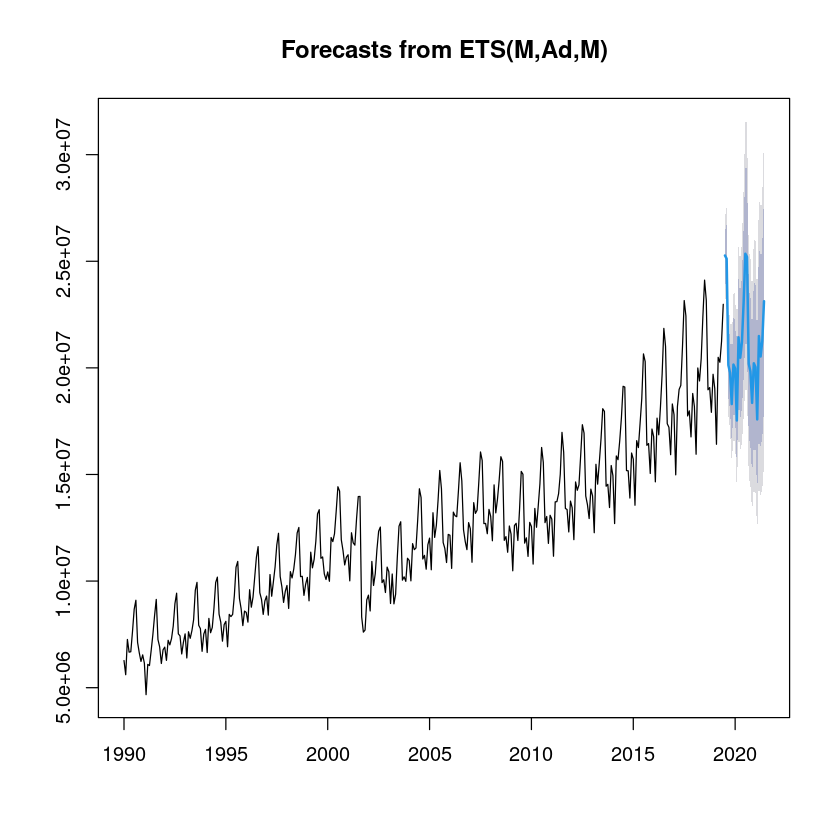

In [13]:
model_ets = ets(data_series)
ets_24 = forecast(model_ets, h=24)
plot(ets_24)
summary(ets_24)


Forecast method: ARIMA(3,1,1)(0,1,1)[12]

Model Information:
Series: data_series 
ARIMA(3,1,1)(0,1,1)[12] 

Coefficients:
         ar1     ar2     ar3      ma1     sma1
      0.6569  0.0333  0.0106  -0.8722  -0.6025
s.e.  0.1514  0.0732  0.0754   0.1432   0.0439

sigma^2 = 1.618e+11:  log likelihood = -4884.81
AIC=9781.61   AICc=9781.86   BIC=9804.6

Error measures:
                   ME     RMSE      MAE        MPE     MAPE     MASE
Training set 14360.13 391890.5 265530.4 0.02355038 2.320078 0.361938
                     ACF1
Training set -0.003518672

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 2019       24822395 24306890 25337900 24033998 25610791
Aug 2019       24070465 23415203 24725728 23068327 25072603
Sep 2019       19946707 19204401 20689012 18811448 21081965
Oct 2019       20014827 19208861 20820793 18782209 21247445
Nov 2019       18806082 17950196 19661969 17497116 20115048
Dec 2019       20760691 19863451 21657931 19388481 22132901
Jan 2020

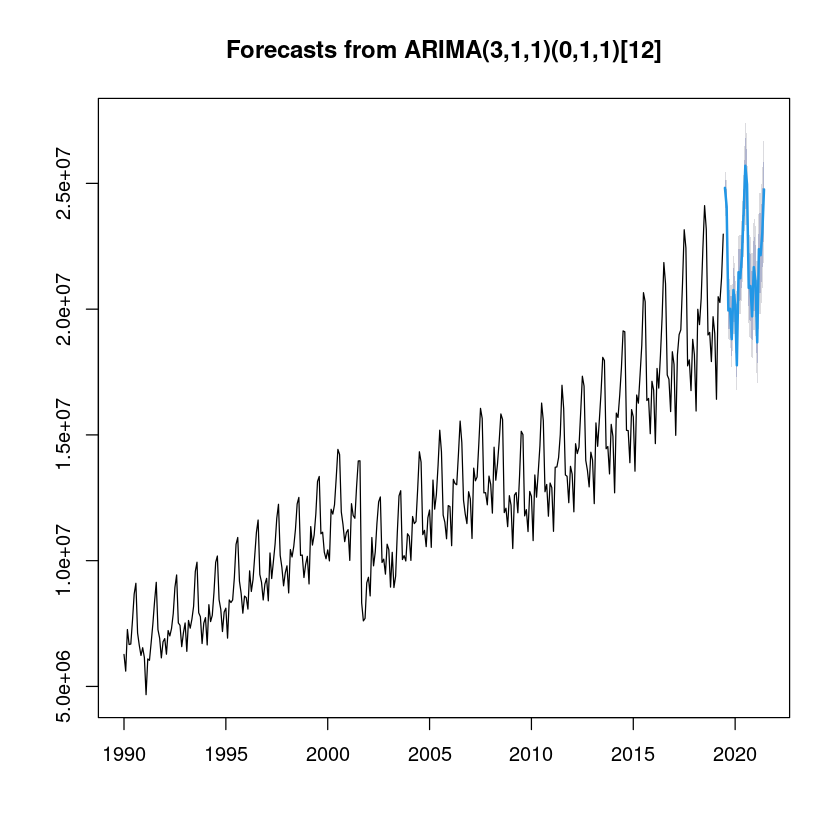

In [14]:
model_arima = auto.arima(data_series)
arima_24 = forecast(model_arima, h=24)
plot(arima_24)
summary(arima_24)

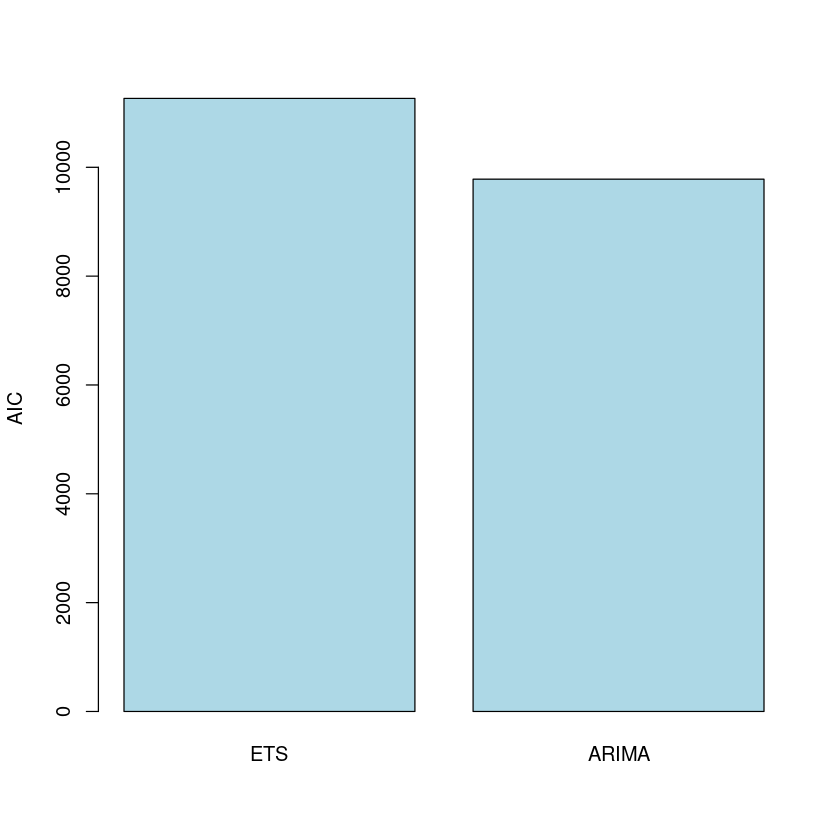

In [16]:
barplot(c(ETS = model_ets$aic, ARIMA=model_arima$aic), col = "light blue", ylab = "AIC")